In [1]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

## Task 4 - Text Classification

First we load the feature matrices and the ground truth sentiment labels that we compiled in task 3.

In [2]:
bow_data = pd.read_csv('feature_matrix_bow.csv')
tfidf_data = pd.read_csv('feature_matrix_tfidf.csv')
word2vec_data = pd.read_csv('feature_matrix_word2vec.csv')
glove_data = pd.read_csv('feature_matrix_glove.csv')

In [3]:
reviews = pd.read_csv('ground_truth_reviews.csv')
ground_truth = reviews['ground_truth_sentiment'].values

Now we define a function, that can apply a classifier to the feature matrix and the ground truth labels, and print out the accuracy, precision, recall, F1 score and confusion matrix.

In [4]:
def classifier(features, ground_truth, name, clf):    
    y_pred = cross_val_predict(clf, features, ground_truth, cv=5)    
    print(f'Accuracy for {name}: {accuracy_score(ground_truth, y_pred):.4f}')
    print(f"Precision for {name}: {precision_score(ground_truth, y_pred, average='weighted'):.4f}")
    print(f"Recall for {name}: {recall_score(ground_truth, y_pred, average='weighted'):.4f}")
    print(f"F1 Score for {name}: {f1_score(ground_truth, y_pred, average='weighted'):.4f}")
    
    cm = confusion_matrix(ground_truth, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(text_kw={'color': 'black'})
    plt.title(f'Confusion Matrix for Naive Bayes on {name} Features')
    plt.show()
    
    return f1_score(ground_truth, y_pred, average='weighted')

We also create a dictionary to store the F1 scores for each classifier and feature matrix combination for later comparison.

In [5]:
f1_scores = {
    "naive_bayes": {
        "bow": 0.0,
        "tfidf": 0.0,
        "word2vec": 0.0,
        "glove": 0.0
    },
    "svm": {
        "bow": 0.0,
        "tfidf": 0.0,
        "word2vec": 0.0,
        "glove": 0.0
    },
    "random_forest": {
        "bow": 0.0,
        "tfidf": 0.0,
        "word2vec": 0.0,
        "glove": 0.0
    }
}

### 4.1. Naive Bayes Classifier
We first try using the Naive Bayes classifier on the different feature matrices. 

We selected the Naive Bayes classifier because it is simple, fast, and often effective for text classification tasks.

We use `MultinomialNB` for Bag of Words, TF-IDF, and Word2Vec. And we use `GaussianNB` for GloVe.

Accuracy for Bag of Words: 0.9580
Precision for Bag of Words: 0.9612
Recall for Bag of Words: 0.9580
F1 Score for Bag of Words: 0.9592


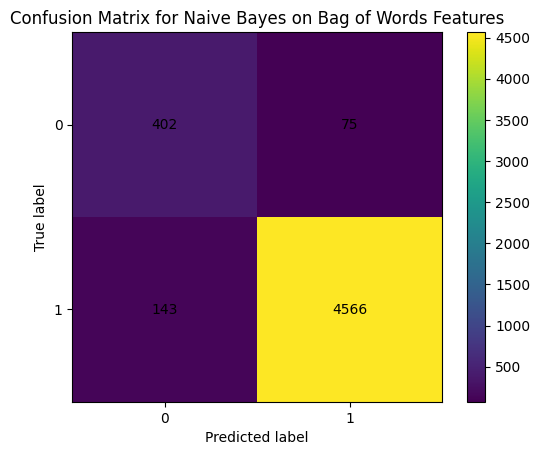

In [6]:
f1_scores["naive_bayes"]["bow"] = classifier(bow_data, ground_truth, "Bag of Words", MultinomialNB())

Accuracy for TF-IDF: 0.9321
Precision for TF-IDF: 0.9319
Recall for TF-IDF: 0.9321
F1 Score for TF-IDF: 0.9320


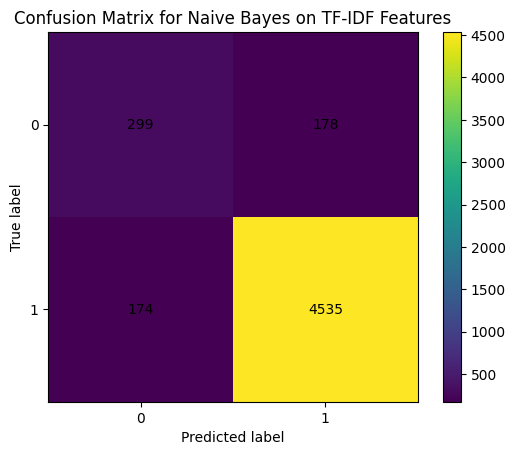

In [7]:
f1_scores["naive_bayes"]["tfidf"] = classifier(MinMaxScaler().fit_transform(tfidf_data), ground_truth, "TF-IDF", MultinomialNB())

Accuracy for Word2Vec: 0.9462
Precision for Word2Vec: 0.9583
Recall for Word2Vec: 0.9462
F1 Score for Word2Vec: 0.9500


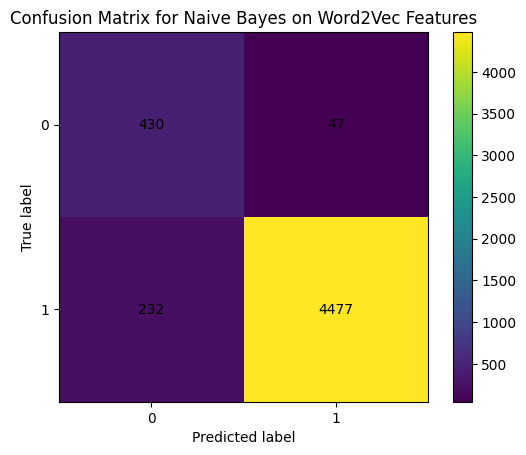

In [8]:
f1_scores["naive_bayes"]["word2vec"] = classifier(MinMaxScaler().fit_transform(word2vec_data), ground_truth, "Word2Vec", MultinomialNB())

Accuracy for GloVe: 0.9115
Precision for GloVe: 0.9466
Recall for GloVe: 0.9115
F1 Score for GloVe: 0.9222


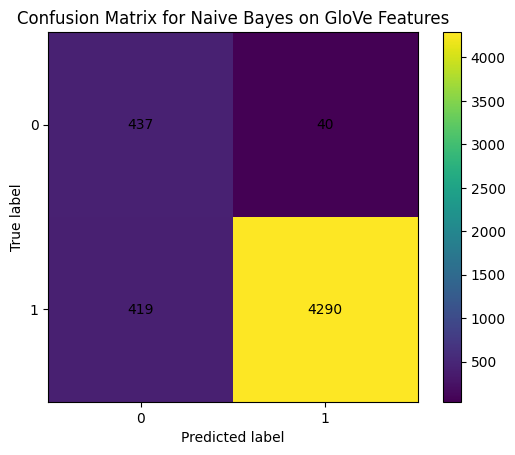

In [9]:
f1_scores["naive_bayes"]["glove"] = classifier(RobustScaler().fit_transform(glove_data), ground_truth, "GloVe", GaussianNB())

### 4.2. Support Vector Machine Classifier
Next, we apply the Support Vector Machine (SVM) classifier to the feature matrices.


We use `SVC` with a linear kernel, which is often effective for text classification tasks.

Accuracy for Bag of Words: 0.9620
Precision for Bag of Words: 0.9610
Recall for Bag of Words: 0.9620
F1 Score for Bag of Words: 0.9614


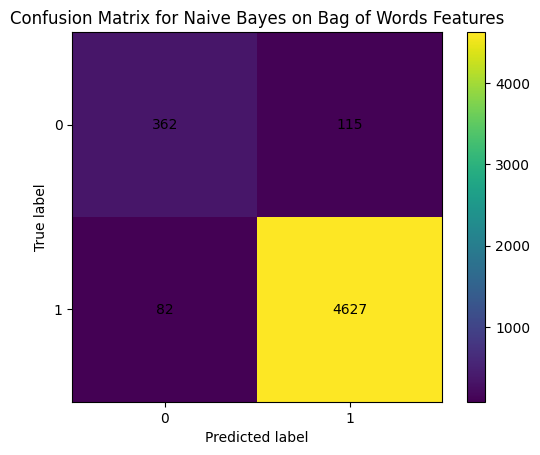

In [10]:
f1_scores["svm"]["bow"] = classifier(bow_data, ground_truth, "Bag of Words", SVC(kernel='linear'))

Accuracy for TF-IDF: 0.9636
Precision for TF-IDF: 0.9618
Recall for TF-IDF: 0.9636
F1 Score for TF-IDF: 0.9617


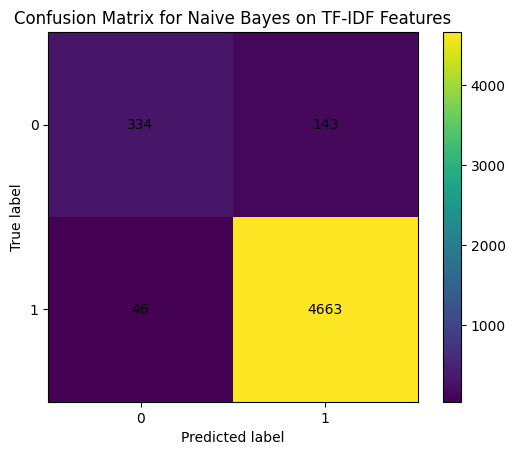

In [11]:
f1_scores["svm"]["tfidf"] = classifier(tfidf_data, ground_truth, "TF-IDF", SVC(kernel='linear'))

Accuracy for Word2Vec: 0.9686
Precision for Word2Vec: 0.9683
Recall for Word2Vec: 0.9686
F1 Score for Word2Vec: 0.9684


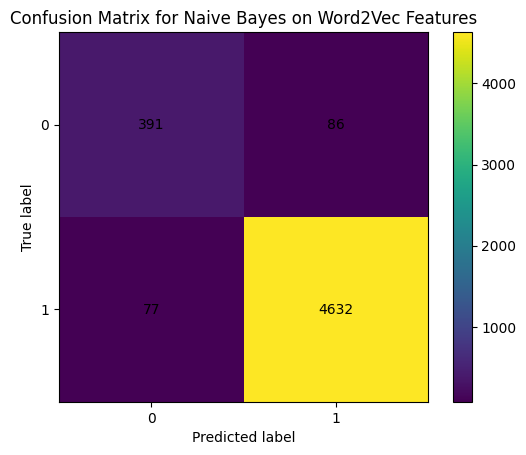

In [12]:
f1_scores["svm"]["word2vec"] = classifier(word2vec_data, ground_truth, "Word2Vec", SVC(kernel='linear'))

Accuracy for GloVe: 0.9672
Precision for GloVe: 0.9664
Recall for GloVe: 0.9672
F1 Score for GloVe: 0.9667


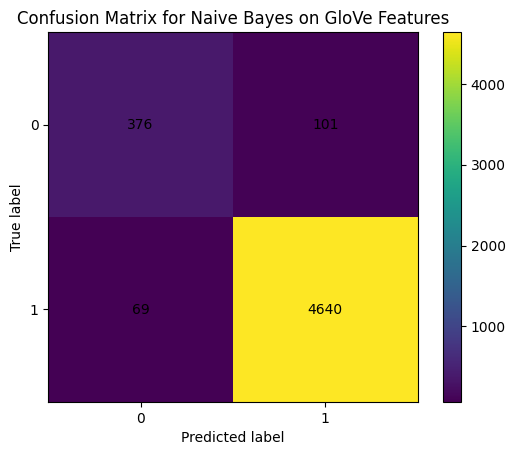

In [13]:
f1_scores["svm"]["glove"] = classifier(glove_data, ground_truth, "GloVe", SVC(kernel='linear'))

### 4.3. Random Forest Classifier

Finally, we apply the Random Forest classifier to the feature matrices.

We use `RandomForestClassifier`, which is an ensemble method that can handle high-dimensional data and is robust to overfitting.

Accuracy for Bag of Words: 0.9412
Precision for Bag of Words: 0.9401
Recall for Bag of Words: 0.9412
F1 Score for Bag of Words: 0.9302


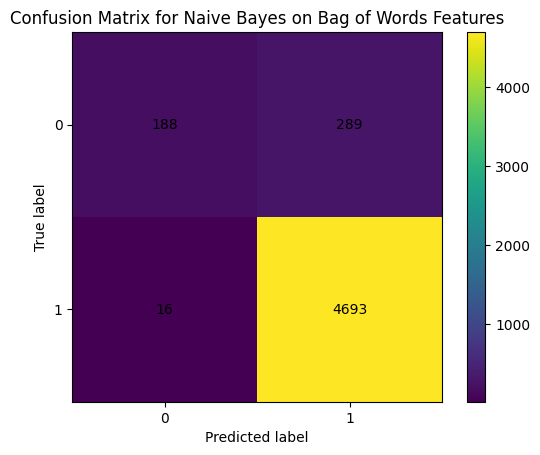

In [14]:
f1_scores["random_forest"]["bow"] = classifier(bow_data, ground_truth, "Bag of Words", RandomForestClassifier())

Accuracy for TF-IDF: 0.9400
Precision for TF-IDF: 0.9423
Recall for TF-IDF: 0.9400
F1 Score for TF-IDF: 0.9270


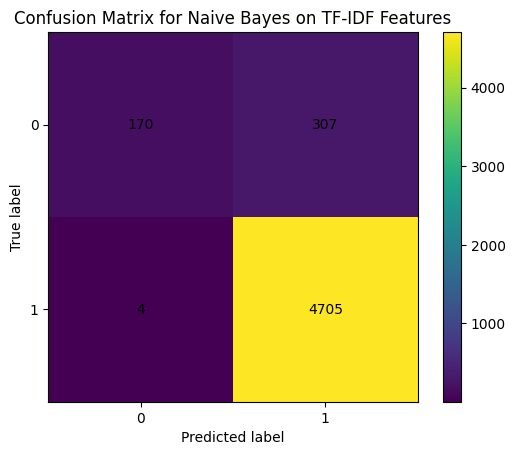

In [15]:
f1_scores["random_forest"]["tfidf"] = classifier(tfidf_data, ground_truth, "TF-IDF", RandomForestClassifier())

Accuracy for Word2Vec: 0.9645
Precision for Word2Vec: 0.9635
Recall for Word2Vec: 0.9645
F1 Score for Word2Vec: 0.9639


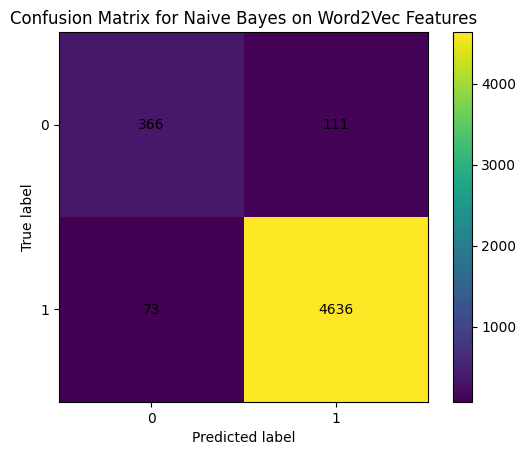

In [16]:
f1_scores["random_forest"]["word2vec"] = classifier(word2vec_data, ground_truth, "Word2Vec", RandomForestClassifier())

Accuracy for GloVe: 0.9495
Precision for GloVe: 0.9467
Recall for GloVe: 0.9495
F1 Score for GloVe: 0.9435


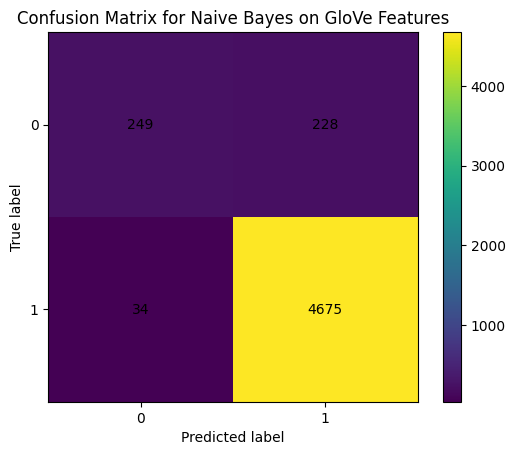

In [17]:
f1_scores["random_forest"]["glove"] = classifier(glove_data, ground_truth, "GloVe", RandomForestClassifier())

Finally, we print out the F1 scores for each classifier and feature matrix combination in a DataFrame for easy comparison.

In [18]:
f1_df = pd.DataFrame(f1_scores)
print(f1_df)

          naive_bayes       svm  random_forest
bow          0.959209  0.961399       0.930228
tfidf        0.931996  0.961679       0.927010
word2vec     0.950031  0.968435       0.963855
glove        0.922219  0.966706       0.943541


From the results, we can see that the SVM classifier with Word2Vec has the highest F1 score, with a score of 0.968.